<a href="https://colab.research.google.com/github/sushil1902/PCA/blob/main/PCA_Practice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [158]:
df = pd.read_csv("https://raw.githubusercontent.com/sushil1902/PCA/main/PCA%20-%20Crowdedness%20at%20the%20Campus%20Gym")
df.shape

(62184, 11)

In [159]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [160]:
df.describe()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000,62184.000000
mean,29.072543,45799.437958,2.982504,0.282870,0.002573,58.557108,0.078831,0.660218,7.439824,12.236460
std,22.689026,24211.275891,1.996825,0.450398,0.050660,6.316396,0.269476,0.473639,3.445069,6.717631
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.140000,0.000000,0.000000,1.000000,0.000000
25%,9.000000,26624.000000,1.000000,0.000000,0.000000,55.000000,0.000000,0.000000,5.000000,7.000000
50%,28.000000,46522.500000,3.000000,0.000000,0.000000,58.340000,0.000000,1.000000,8.000000,12.000000
75%,43.000000,66612.000000,5.000000,1.000000,0.000000,62.280000,0.000000,1.000000,10.000000,18.000000
max,145.000000,86399.000000,6.000000,1.000000,1.000000,87.170000,1.000000,1.000000,12.000000,23.000000


In [161]:
df.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


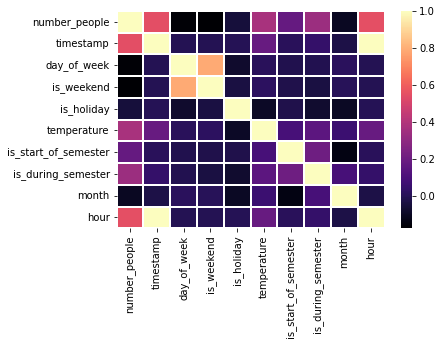

In [162]:
sns.heatmap(df.corr(),cmap = 'magma', linewidths=1)

In [163]:
df.columns

Index(['number_people', 'date', 'timestamp', 'day_of_week', 'is_weekend',
       'is_holiday', 'temperature', 'is_start_of_semester',
       'is_during_semester', 'month', 'hour'],
      dtype='object')

In [164]:
df.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [165]:
X = df.iloc[:,1:]
Y = df.iloc[:,0]

In [166]:
X.head()

,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


In [167]:
Y.head()

0    37
1    45
2    40
3    44
4    45
Name: number_people, dtype: int64

In [168]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  62184 non-null  object 
 1   timestamp             62184 non-null  int64  
 2   day_of_week           62184 non-null  int64  
 3   is_weekend            62184 non-null  int64  
 4   is_holiday            62184 non-null  int64  
 5   temperature           62184 non-null  float64
 6   is_start_of_semester  62184 non-null  int64  
 7   is_during_semester    62184 non-null  int64  
 8   month                 62184 non-null  int64  
 9   hour                  62184 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 4.7+ MB


In [169]:
X.drop('date',axis=1,inplace=True)

In [170]:
X.head()

,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,61211,4,0,0,71.76,0,0,8,17
1,62414,4,0,0,71.76,0,0,8,17
2,63015,4,0,0,71.76,0,0,8,17
3,63616,4,0,0,71.76,0,0,8,17
4,64217,4,0,0,71.76,0,0,8,17


In [171]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.20,random_state= 0)

In [172]:
col = list(X_train.columns)
col

['timestamp',
 'day_of_week',
 'is_weekend',
 'is_holiday',
 'temperature',
 'is_start_of_semester',
 'is_during_semester',
 'month',
 'hour']

In [173]:
# Data must be sacled before PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[col] = scaler.fit_transform(X_train[col])
X_test[col] = scaler.transform(X_test[col])

In [174]:
X_train.head()

,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
19329,0.436362,1.510975,1.591750,-0.05079,0.385661,-0.291538,0.716938,-1.579075,0.409363
38712,-1.379801,1.510975,1.591750,-0.05079,-0.245076,-0.291538,-1.394821,0.161591,-1.377214
3711,-1.744619,-0.997384,-0.628239,-0.05079,0.309783,-0.291538,0.716938,0.451702,-1.674977
41920,-1.432673,-0.997384,-0.628239,-0.05079,0.096376,3.430082,0.716938,0.161591,-1.377214
43371,0.713859,0.507632,-0.628239,-0.05079,0.723951,-0.291538,0.716938,0.451702,0.707126


In [175]:
X_test.head()

,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
6682,-0.778131,0.005960,-0.628239,-0.05079,0.229162,-0.291538,0.716938,0.741814,-0.781688
37799,0.877185,1.510975,1.591750,-0.05079,0.589583,-0.291538,-1.394821,-0.128520,0.856008
2657,0.262792,0.005960,-0.628239,-0.05079,2.214638,-0.291538,0.716938,0.451702,0.260482
41010,-1.695382,-0.997384,-0.628239,-0.05079,0.123249,-0.291538,-1.394821,0.161591,-1.674977
35104,1.648624,-0.997384,-0.628239,-0.05079,-0.034830,-0.291538,-1.394821,-0.128520,1.600415


# PCA considering all components

In [176]:
len(X_train.columns)

9

In [177]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
pca = PCA()
X_train[col] = pca.fit_transform(X_train[col])
X_test[col] = pca.transform(X_test[col])

In [178]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([2.30955437e-01, 2.00081683e-01, 1.45123034e-01, 1.28658061e-01,
       1.01643906e-01, 9.27673503e-02, 7.75920089e-02, 2.30759000e-02,
       1.02618932e-04])

In [179]:
print("Type of explained_variance is : ",type(explained_variance))

Type of explained_variance is :  <class 'numpy.ndarray'>


In [180]:
components = len(explained_variance)
components

9

In [181]:
np.sum(explained_variance)

1.0

In [182]:
np.sum(explained_variance[:2])

0.43103712014149054

In [183]:
np.sum(explained_variance[:3])

0.57616015429263

In [184]:
np.sum(explained_variance[:4])

0.7048182153961509

In [185]:
np.sum(explained_variance[:5])

0.8064621218734587

In [186]:
np.sum(explained_variance[:6])

0.8992294721983571

In [187]:
np.sum(explained_variance[:7])

0.976821481108041

In [188]:
np.sum(explained_variance[7:])

0.023178518891959

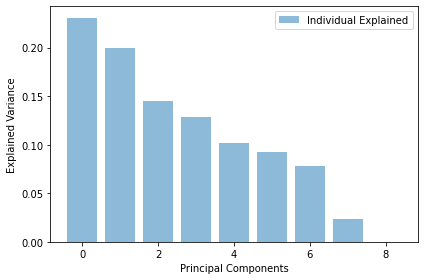

In [189]:
plt.bar(range(components),explained_variance,alpha = 0.5,align = 'center',label='Individual Explained')
plt.ylabel('Explained Variance')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()

In [190]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [191]:
from tqdm import tqdm
estimators = np.arange(10,200,30)
scores = []
for n in tqdm(estimators):
    model.set_params(n_estimators=n, n_jobs=-1)
    model.fit(X_train,Y_train)
    scores.append(model.score(X_test, Y_test))
print(scores)

100%|██████████| 7/7 [04:39<00:00, 39.90s/it]

[0.8854909064926274, 0.8980821696932877, 0.8976940567917212, 0.8992887269776003, 0.8988067850316547, 0.9008331511032647, 0.9000633822106203]


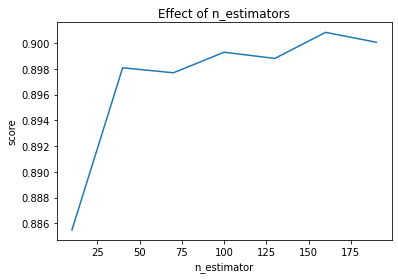

In [192]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [193]:
regressor = RandomForestRegressor(n_estimators=130,random_state=0)
regressor.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=130, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [194]:
Y_pred = regressor.predict(X_test)

In [195]:
from sklearn.metrics import mean_squared_error,r2_score
r2_score(Y_test,Y_pred)

0.8992298415704245

In [196]:
rmse =np.sqrt(mean_squared_error(Y_test,Y_pred))
rmse

7.200665423385055

* The R2 score and RMSE is when we considering all 9 variable

# Now considering first 2 components

In [197]:
len(X_train.columns)

9

In [198]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
X_train2 = pca2.fit_transform(X_train[col])
X_test2 = pca2.transform(X_test[col])

In [199]:
explained_variance = pca2.explained_variance_ratio_
explained_variance

array([0.23095544, 0.20008168])

In [200]:
type(explained_variance)

numpy.ndarray

In [201]:
components = len(explained_variance)
components

2

In [202]:
np.sum(explained_variance)

0.4310371201414907

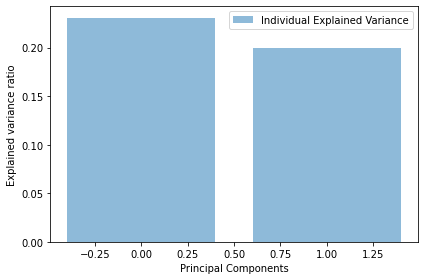

In [203]:
plt.bar(range(components), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance') 
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal Components")
plt.legend(loc='best')
plt.tight_layout()

In [204]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [ ]:
from tqdm import tqdm
estimators = np.arange(10,200,30)
score = []

for n in tqdm(estimators):
  model.set_params(n_estimators =n,n_jobs=-1)
  model.fit(X_train2,Y_train)
  scores.append(model.score(X_test2,Y_test))
print(scores)

 86%|████████▌ | 6/7 [00:56<00:12, 12.57s/it]

In [ ]:
np.mean(np.array(scores))

In [ ]:
regressor = RandomForestRegressor(n_estimators=130, random_state=0)
regressor.fit(X_train2, Y_train)

In [ ]:
Y_pred = regressor.predict(X_test2)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(Y_test, Y_pred)

In [ ]:
np.sqrt(mean_squared_error(Y_test, Y_pred))

# PCA - Considering first 3 components

In [ ]:
len(X_train.columns)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
pca3 = PCA(n_components=3)
X_train3 = pca3.fit_transform(X_train[col])
X_test3 = pca3.transform(X_test[col])

In [ ]:
explained_variance = pca3.explained_variance_ratio_
explained_variance

In [ ]:
type(explained_variance)

In [ ]:
components = len(explained_variance)
components

In [ ]:
np.sum(explained_variance)

In [ ]:
plt.bar(range(components), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance') 
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal Components")
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [ ]:
from tqdm import tqdm
estimators = np.arange(10,200,30)
scores = []
for n in tqdm(estimators):
    model.set_params(n_estimators=n, n_jobs=-1)
    model.fit(X_train3,Y_train)
    scores.append(model.score(X_test3, Y_test))
print(scores)

In [ ]:
np.mean(np.array(scores))

In [ ]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [ ]:
regressor = RandomForestRegressor(n_estimators=162, random_state=0)
regressor.fit(X_train3, Y_train)

In [ ]:
y_pred = regressor.predict(X_test3)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(Y_test, Y_pred)

In [ ]:
np.sqrt(mean_squared_error(Y_test, Y_pred))

# PCA - Considering first 4 components

In [ ]:
len(X_train.columns)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA
pca4 = PCA(n_components=4)
X_train4 = pca4.fit_transform(X_train[col])
X_test4 = pca4.transform(X_test[col])

In [ ]:
explained_variance = pca4.explained_variance_ratio_
explained_variance

In [ ]:
type(explained_variance)

In [ ]:
components = len(explained_variance)
components

In [ ]:
np.sum(explained_variance)

In [ ]:
plt.bar(range(components), explained_variance, alpha=0.5, align='center', label='Individual Explained Variance') 
plt.ylabel("Explained variance ratio")
plt.xlabel("Principal Components")
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [ ]:
from tqdm import tqdm
estimators = np.arange(10,200,30)
scores = []
for n in tqdm(estimators):
    model.set_params(n_estimators=n, n_jobs=-1)
    model.fit(X_train4,Y_train)
    scores.append(model.score(X_test4, Y_test))
print(scores)

In [ ]:
np.mean(np.array(scores))

In [ ]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [ ]:
regressor = RandomForestRegressor(n_estimators=187, random_state=0)
regressor.fit(X_train4, Y_train)

In [ ]:
y_pred = regressor.predict(X_test4)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
r2_score(Y_test, Y_pred)

In [ ]:
np.sqrt(mean_squared_error(Y_test, Y_pred))

RESULTS:

ALL PC i.e. 9
r2 - 89.92%
rmse - 7.20

3PC PC
r2 - 88.90%
rmse - 7.55

4PC PC
r2 - 91.31%
rmse - 6.68"

Therefore, we come to a conclusion that instead of choosing all 9 columns, its better to choose just the first four Principal components as they have captures the maximum variance in the IV's.